Num of iterations: 6
Calculated minimum: 5.24280754411e-07


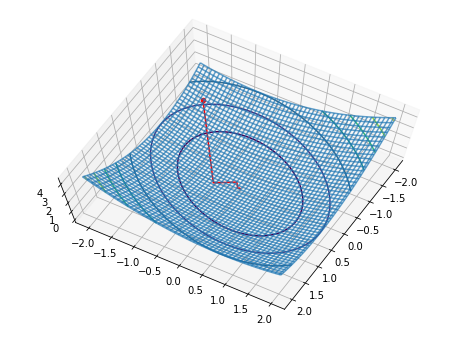

In [91]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

def f(x):
    return x[0]**2/2 + x[1]**2/3 - x[0]*x[1]/4

def g(x):
    return x[0]**2/2 + x[1]**2/3 - x[0]*x[1]/4 + 3*np.exp(-x[0]**2)

def h(x):
    return np.sin(x[0]**2) - np.cos(x[1]**3)

def gradient(f, x, h=.001):
    return np.array([(f([x[0] + h/2, x[1]]) - f([x[0] - h/2, x[1]])) / h, 
                     (f([x[0], x[1] + h/2]) - f([x[0], x[1] - h/2])) / h])

def line_search(f, x, grad, grad_mag, params=[]):
    """
    Returns step size in accordance to the Wolfe conditions
    params=[beta1, beta2]
    """
    beta_1 = params[0]
    beta_2 = params[1]
    alpha = 1
    lower_bound = 0
    upper_bound = 10
    d = -grad / grad_mag
    while True:  # check if alpha is verified under Wolfe conditions
        if f(x + alpha*d) <= f(x) + alpha*beta_1*np.matmul(grad.T, d):
            if np.matmul(gradient(f, x + alpha*d).T, d) >= beta_2*np.matmul(grad.T, d):
                break
            else:
                lower_bound = alpha
        else:
            upper_bound = alpha
        alpha = (upper_bound + lower_bound) / 2
    return alpha

def find_minimum(f, x, method, max_iter, tol, params=[], disp_iter=True):
    point_hist = [[x[0], x[1], f(x)]]
    if method == "GD":
        A = params[0]
        for i in range(max_iter):
            grad = gradient(f, x)
            grad_mag = np.linalg.norm(grad)
            if grad_mag < tol:  # check if close to minimum
                break
            else:
                ####### modify line search method #######
                alpha = np.matmul(grad.T, grad)/np.matmul(grad.T, np.matmul(A, grad))# alpha = line_search(f, x, grad, grad_mag, params=[.5, .9])
                #########################################
            x -= alpha * grad
            point_hist.append([x[0], x[1], f(x)])
        
    elif method == "BFGS":
        B = np.eye(2)
        for i in range(max_iter):
            grad = gradient(f, x)
            grad_mag = np.linalg.norm(grad)
            if grad_mag < tol:  # check if close to minimum
                break
            d = -np.matmul(np.linalg.inv(B), grad)
            alpha = line_search(f, x, grad, grad_mag, params=[.5, .9])
            s = alpha * d
            x += s
            y = gradient(f, x) - grad
            Bs = np.matmul(B, s)
            B += np.matmul(y, y.T)/np.matmul(y.T, s) - np.matmul(Bs, Bs.T)/np.matmul(s.T, Bs)
            point_hist.append([x[0], x[1], f(x)])
            
    elif method == "CG":
        A = params[0]
        b = params[1]
        r = b - np.matmul(A, x)
        d = r
        deltanew = np.matmul(r.T, r)
        delta0 = deltanew
        for i in range(max_iter):
            if deltanew < tol * delta0:
                break
            alpha = deltanew / np.matmul(d.T, np.matmul(A, d))
            x += alpha * d
            point_hist.append([x[0], x[1], f(x)])
            r = b - np.matmul(A, x)
            deltaold = deltanew
            deltanew = np.matmul(r.T, r)
            beta = deltanew / deltaold
            d = r + beta * d        
            
    if disp_iter:
        print("Num of iterations:", i)
        
    return np.asarray(point_hist)


# set limits
x0_min, x0_max = -2, 2
x1_min, x1_max = -2, 2


# perform optimization using self-defined function
x0_rand = (x0_max - x0_min) * np.random.random() + x0_min
x1_rand = (x1_max - x1_min) * np.random.random() + x1_min
A = np.array([[   1, -1/4], 
              [-1/4,  2/3]])
b = np.array([0, 0])
######## modify the method ########
grad_points = find_minimum(f, np.array([x0_rand, x1_rand]), method="GD", max_iter=10, tol=1e-3, params=[A, b], disp_iter=True)
###################################
print("Calculated minimum:", grad_points[-1,-1])

# plot
x0_values = np.linspace(x0_min, x0_max, 100)
x1_values = np.linspace(x1_min, x1_max, 100)
x0_values, x1_values = np.meshgrid(x0_values, x1_values)
y_values = f([x0_values, x1_values])
fig = plt.figure(figsize=(8,6))
ax = fig.gca(projection="3d")
ax.plot_wireframe(x0_values, x1_values, y_values, alpha=.7)
ax.contour(x0_values, x1_values, y_values)
ax.plot(grad_points[:,0], grad_points[:,1], grad_points[:,2], c="r", alpha=1)
ax.scatter(grad_points[0,0], grad_points[0,1], grad_points[0,2], c="r")
ax.view_init(elev=75, azim=30)

Calculated minimum: 3.7260495772047026e-08
Gradient: [-0.00057341  0.        ]


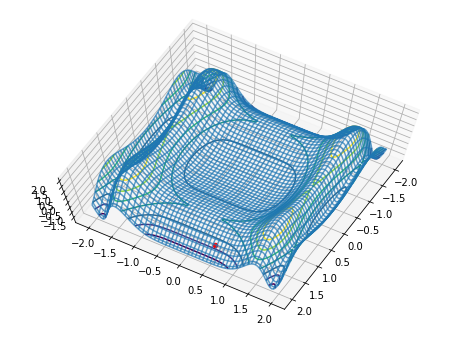

In [87]:
from scipy.optimize import minimize

# set limits
x0_min, x0_max = -2, 2
x1_min, x1_max = -2, 2

# perform optimization using Scipy
x0_rand = (x0_max - x0_min) * np.random.random() + x0_min
x1_rand = (x1_max - x1_min) * np.random.random() + x1_min
res = minimize(f, [x0_rand, x1_rand], method="BFGS", tol=1e-3, options={"disp" : False})
print("Calculated minimum:", res.fun)
print("Gradient:", gradient(h, res.x))

# plot
x0_values = np.linspace(x0_min, x0_max, 100)
x1_values = np.linspace(x1_min, x1_max, 100)
x0_values, x1_values = np.meshgrid(x0_values, x1_values)
y_values = h([x0_values, x1_values])
fig = plt.figure(figsize=(8,6))
ax = fig.gca(projection="3d")
ax.plot_wireframe(x0_values, x1_values, y_values, alpha=.7)
ax.contour(x0_values, x1_values, y_values)
ax.scatter(x0_rand, x1_rand, h([x0_rand, x1_rand]), c="r", alpha=1)
ax.view_init(elev=75, azim=30)